Contient:
- EDA
- Prétraitement
- Modélisations (model/hyper-paramètres/CV)
- Prédictions (performances/évalutations)

Doit intégrer:
- MLFlow de génération du tracking d'expérimentations
- L'interface web 'UI MLFLOW' d'affichage des résultats du tracking MLFLOW (note: conserver des copies d'écran).

# Imports

In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pd.options.display.max_rows = 125
pd.options.display.max_columns = 125
sns.set_theme(style="whitegrid")

# Explanatory Data Analysis

In [3]:
path = "Dataset"
df_application_train = pd.read_csv(os.path.join(path,'application_train.csv'))
df_application_test = pd.read_csv(os.path.join(path,'application_test.csv'))
#df_bureau = pd.read_csv(os.path.join(path,'bureau.csv'))
#df_bureau_balance = pd.read_csv(os.path.join(path,'bureau_balance.csv'))
#df_columns_description = pd.read_csv(os.path.join(path,'HomeCredit_columns_description.csv'), sep=',')
#df_installments_payments = pd.read_csv(os.path.join(path,'installments_payments.csv'))
#df_POS_CASH_balance = pd.read_csv(os.path.join(path,'POS_CASH_balance.csv'))
#df_previous_application = pd.read_csv(os.path.join(path,'previous_application.csv'))
#df_sample_submission = pd.read_csv(os.path.join(path,'sample_submission.csv'))

'''all_dfs= {"df_application_train" : df_application_train, 
          "df_application_test" : df_application_test, 
          "df_bureau" : df_bureau, 
          "df_bureau_balance" : df_bureau_balance, 
          #df_columns_description, 
          "df_installments_payments" : df_installments_payments, 
          "df_POS_CASH_balance" : df_POS_CASH_balance, 
          "df_previous_application" : df_previous_application, 
          "df_sample_submission" : df_sample_submission
         }'''

'all_dfs= {"df_application_train" : df_application_train, \n          "df_application_test" : df_application_test, \n          "df_bureau" : df_bureau, \n          "df_bureau_balance" : df_bureau_balance, \n          #df_columns_description, \n          "df_installments_payments" : df_installments_payments, \n          "df_POS_CASH_balance" : df_POS_CASH_balance, \n          "df_previous_application" : df_previous_application, \n          "df_sample_submission" : df_sample_submission\n         }'

In [4]:
'''for key, df in all_dfs.items():
    print(key, df.shape)'''

'for key, df in all_dfs.items():\n    print(key, df.shape)'

Considérant le nombre important de tables, nous allons dans un premier temps nous focaliser sur les deux tables principales (application_train et application_test) pour créer un pipeline de nettoyage, fetaure engineering et modélisation.  
Nous reviendrons par la suite pour ajouter d'autres features provenant d'autres tables.

### application_train

In [5]:
print(df_application_train.shape)
print(df_application_test.shape)
print(f"Taille relative du train set: {round(100*df_application_train.shape[0]/(df_application_train.shape[0]+df_application_test.shape[0]),0)}%")

(307511, 122)
(48744, 121)
Taille relative du train set: 86.0%


In [6]:
df_application_train.head(3).T

,0,1,2
SK_ID_CURR,100002,100003,100004
TARGET,1,0,0
NAME_CONTRACT_TYPE,Cash loans,Cash loans,Revolving loans
CODE_GENDER,M,F,M
FLAG_OWN_CAR,N,N,Y
FLAG_OWN_REALTY,Y,N,Y
CNT_CHILDREN,0,0,0
AMT_INCOME_TOTAL,202500.0,270000.0,67500.0
AMT_CREDIT,406597.5,1293502.5,135000.0
AMT_ANNUITY,24700.5,35698.5,6750.0


**Feature Target**

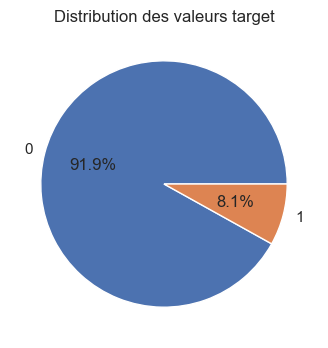

In [7]:
vc_target = df_application_train['TARGET'].value_counts()
plt.figure(figsize=(4,4))
plt.pie(vc_target, labels=vc_target.index, autopct='%1.1f%%')
plt.title('Distribution des valeurs target')
plt.show()

Notre target, avec 91.9% de valeurs 0 et 8.1% de valeurs 1 est clairement inéquilibrée.  
***Action à faire:***  
Nous allons devoir prendre en compte cela dans la modélisation et utiliser des techniquees afin de réduire le déséquilibre des classes.

**Valeurs manquantes**

In [8]:
# Function to calculate missing values by column# Funct 
def missing_values_table(df):
    
    # Total missing values
    mis_val = df.isnull().sum()
    
    # Percentage of missing values
    mis_val_percent = 100 * df.isnull().sum() / len(df)
    
    # Make a table with the results
    mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
    
    # Rename the columns
    mis_val_table_ren_columns = mis_val_table.rename(
    columns = {0 : 'Valeurs manquantes', 1 : '% de Valeurs totales'})
    
    # Sort the table by percentage of missing descending
    mis_val_table_ren_columns = mis_val_table_ren_columns[mis_val_table_ren_columns.iloc[:,1] != 0].sort_values('% de Valeurs totales', ascending=False).round(1)
    
    # Print some summary information
    print ("Le dataframe a " + str(df.shape[1]) + " colonnes.\n"      
            "Il y a " + str(mis_val_table_ren_columns.shape[0]) +
              " colonnes contenant des valeurs manquantes.")
        
    # Return the dataframe with missing information
    return mis_val_table_ren_columns

In [9]:
missing_values = missing_values_table(df_application_train)
missing_values

Le dataframe a 122 colonnes.
Il y a 67 colonnes contenant des valeurs manquantes.


,Missing Values,% of Total Values
COMMONAREA_MEDI,214865,69.9
COMMONAREA_AVG,214865,69.9
COMMONAREA_MODE,214865,69.9
NONLIVINGAPARTMENTS_MEDI,213514,69.4
NONLIVINGAPARTMENTS_MODE,213514,69.4
NONLIVINGAPARTMENTS_AVG,213514,69.4
FONDKAPREMONT_MODE,210295,68.4
LIVINGAPARTMENTS_MODE,210199,68.4
LIVINGAPARTMENTS_MEDI,210199,68.4
LIVINGAPARTMENTS_AVG,210199,68.4


Nous nous retrouvons avec un nombre important de valeurs manquantes.  
***Action à faire:***  
Nous allons devoir faire un choix dans notre approche:  
- utiliser des valeurs d'imputation (mean, median, iterativeImputer, KNNImputer)
- utiliser un modèle qui peut gérer les valeurs manquantes (XGBoost)

**Features types**

In [10]:
df_application_train.dtypes.value_counts()

float64    65
int64      41
object     16
dtype: int64

Nous avons surtout des features numériques (106) dont la target pour 16 feautre catégorielles.

**Valeurs uniques (features catégorielles)**

In [11]:
list_features_categorielles = df_application_train.select_dtypes('object').columns.tolist()
df_application_train.select_dtypes('object').apply(pd.Series.nunique, axis=0)

NAME_CONTRACT_TYPE             2
CODE_GENDER                    3
FLAG_OWN_CAR                   2
FLAG_OWN_REALTY                2
NAME_TYPE_SUITE                7
NAME_INCOME_TYPE               8
NAME_EDUCATION_TYPE            5
NAME_FAMILY_STATUS             6
NAME_HOUSING_TYPE              6
OCCUPATION_TYPE               18
WEEKDAY_APPR_PROCESS_START     7
ORGANIZATION_TYPE             58
FONDKAPREMONT_MODE             4
HOUSETYPE_MODE                 3
WALLSMATERIAL_MODE             7
EMERGENCYSTATE_MODE            2
dtype: int64

In [12]:
def display_value_counts_ameliore(dataframe, feature, disp=True):
    vc = pd.DataFrame(dataframe[feature].value_counts())
    vc['freq.'] = round(100*vc[feature]/vc[feature].sum(),2)
    if disp:
        display('*'*30)
        display(feature, vc)
    return(vc)

for feature in list_features_categorielles:
    display_value_counts_ameliore(df_application_train, feature)

'******************************'

'NAME_CONTRACT_TYPE'

,NAME_CONTRACT_TYPE,freq.
Cash loans,278232,90.48
Revolving loans,29279,9.52


'******************************'

'CODE_GENDER'

,CODE_GENDER,freq.
F,202448,65.83
M,105059,34.16
XNA,4,0.00


'******************************'

'FLAG_OWN_CAR'

,FLAG_OWN_CAR,freq.
N,202924,65.99
Y,104587,34.01


'******************************'

'FLAG_OWN_REALTY'

,FLAG_OWN_REALTY,freq.
Y,213312,69.37
N,94199,30.63


'******************************'

'NAME_TYPE_SUITE'

,NAME_TYPE_SUITE,freq.
Unaccompanied,248526,81.16
Family,40149,13.11
"Spouse, partner",11370,3.71
Children,3267,1.07
Other_B,1770,0.58
Other_A,866,0.28
Group of people,271,0.09


'******************************'

'NAME_INCOME_TYPE'

,NAME_INCOME_TYPE,freq.
Working,158774,51.63
Commercial associate,71617,23.29
Pensioner,55362,18.00
State servant,21703,7.06
Unemployed,22,0.01
Student,18,0.01
Businessman,10,0.00
Maternity leave,5,0.00


'******************************'

'NAME_EDUCATION_TYPE'

,NAME_EDUCATION_TYPE,freq.
Secondary / secondary special,218391,71.02
Higher education,74863,24.34
Incomplete higher,10277,3.34
Lower secondary,3816,1.24
Academic degree,164,0.05


'******************************'

'NAME_FAMILY_STATUS'

,NAME_FAMILY_STATUS,freq.
Married,196432,63.88
Single / not married,45444,14.78
Civil marriage,29775,9.68
Separated,19770,6.43
Widow,16088,5.23
Unknown,2,0.00


'******************************'

'NAME_HOUSING_TYPE'

,NAME_HOUSING_TYPE,freq.
House / apartment,272868,88.73
With parents,14840,4.83
Municipal apartment,11183,3.64
Rented apartment,4881,1.59
Office apartment,2617,0.85
Co-op apartment,1122,0.36


'******************************'

'OCCUPATION_TYPE'

,OCCUPATION_TYPE,freq.
Laborers,55186,26.14
Sales staff,32102,15.21
Core staff,27570,13.06
Managers,21371,10.12
Drivers,18603,8.81
High skill tech staff,11380,5.39
Accountants,9813,4.65
Medicine staff,8537,4.04
Security staff,6721,3.18
Cooking staff,5946,2.82


'******************************'

'WEEKDAY_APPR_PROCESS_START'

,WEEKDAY_APPR_PROCESS_START,freq.
TUESDAY,53901,17.53
WEDNESDAY,51934,16.89
MONDAY,50714,16.49
THURSDAY,50591,16.45
FRIDAY,50338,16.37
SATURDAY,33852,11.01
SUNDAY,16181,5.26


'******************************'

'ORGANIZATION_TYPE'

,ORGANIZATION_TYPE,freq.
Business Entity Type 3,67992,22.11
XNA,55374,18.01
Self-employed,38412,12.49
Other,16683,5.43
Medicine,11193,3.64
Business Entity Type 2,10553,3.43
Government,10404,3.38
School,8893,2.89
Trade: type 7,7831,2.55
Kindergarten,6880,2.24


'******************************'

'FONDKAPREMONT_MODE'

,FONDKAPREMONT_MODE,freq.
reg oper account,73830,75.94
reg oper spec account,12080,12.43
not specified,5687,5.85
org spec account,5619,5.78


'******************************'

'HOUSETYPE_MODE'

,HOUSETYPE_MODE,freq.
block of flats,150503,98.23
specific housing,1499,0.98
terraced house,1212,0.79


'******************************'

'WALLSMATERIAL_MODE'

,WALLSMATERIAL_MODE,freq.
Panel,66040,43.69
"Stone, brick",64815,42.88
Block,9253,6.12
Wooden,5362,3.55
Mixed,2296,1.52
Monolithic,1779,1.18
Others,1625,1.07


'******************************'

'EMERGENCYSTATE_MODE'

,EMERGENCYSTATE_MODE,freq.
No,159428,98.56
Yes,2328,1.44


In [13]:
vc_organization_type = display_value_counts_ameliore(df_application_train, 'ORGANIZATION_TYPE')#, disp=False)

'******************************'

'ORGANIZATION_TYPE'

,ORGANIZATION_TYPE,freq.
Business Entity Type 3,67992,22.11
XNA,55374,18.01
Self-employed,38412,12.49
Other,16683,5.43
Medicine,11193,3.64
Business Entity Type 2,10553,3.43
Government,10404,3.38
School,8893,2.89
Trade: type 7,7831,2.55
Kindergarten,6880,2.24


In [14]:
vc_organization_type.rename(columns={"ORGANIZATION_TYPE":"Count"}, inplace=True)
vc_organization_type['organisation'] = vc_organization_type.index
display(vc_organization_type.head())

,Count,freq.,organisation
Business Entity Type 3,67992,22.11,Business Entity Type 3
XNA,55374,18.01,XNA
Self-employed,38412,12.49,Self-employed
Other,16683,5.43,Other
Medicine,11193,3.64,Medicine


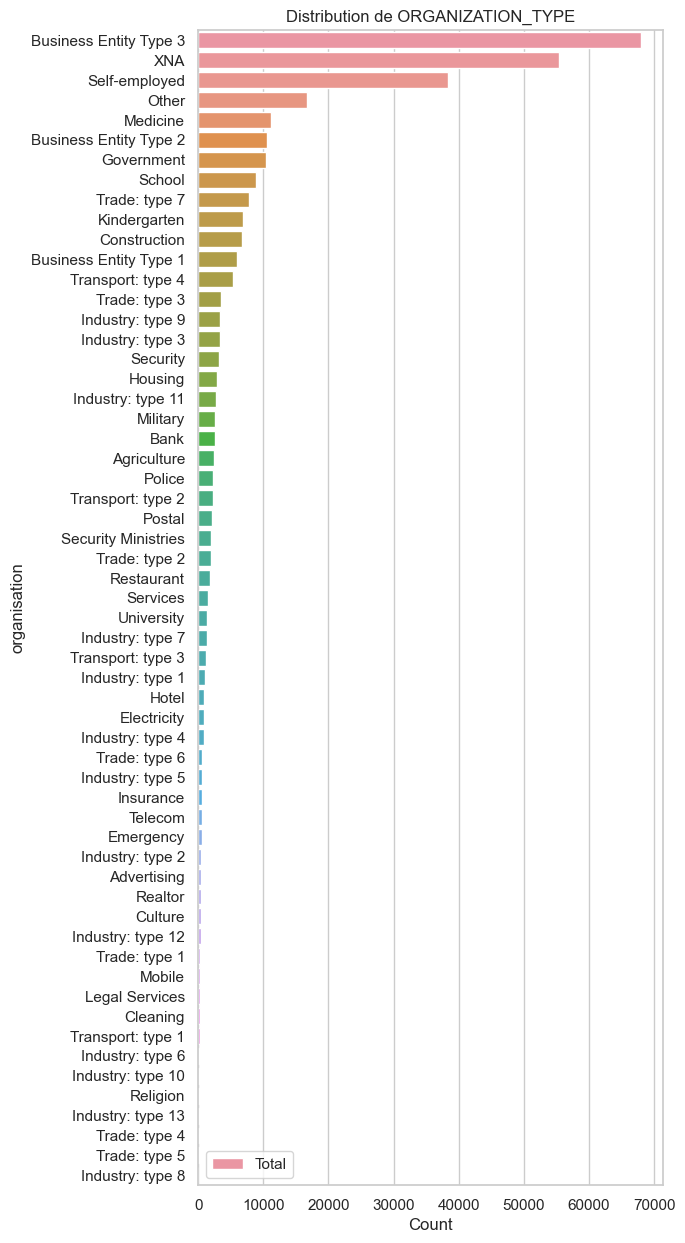

In [15]:
plt.figure(figsize=(6,15))
sns.barplot(x="Count", y="organisation", data=vc_organization_type, label="Total")#, color="b")
plt.title('Distribution de ORGANIZATION_TYPE')
plt.legend()

Commentaires:  
- Pour **CODE_GENDER**, nous avons 4 valeurs 'XNA' qui peuvent s'interpréter come non-renseignées ou 'Ne se prononce pas'. Considérant qu'il est possible que les personnes se déclarent non-binaires, nous allons laisser cette variable en l'état.  
- Pour **FAMILY_STATUS**, nous avons 2 valeurs 'Unknown' qui peuvent être interprétées comme non-reseignées ou 'Ne se prononce pas'. Similairement à CODE_GENDER, nous allons laisser cette valeur en l'état.  
- Pour **WEEKDAY_APPR_PROCESS_START**, nous sommes un peu étonné de trouver le dimanche (Sunday), mais il est probable que la demande puisse se faire en ligne, dans quel cas, la valeur est correcte.
- La distribution de **ORGANIZATION_TYPE** est très skewed.

***Action à réaliser:***  
Nous allons One-hot encoder ces variables (avant d'étudier les corrélations à la target). La dimensionnalité agrandie de notre base sera ensuite traitée au travers des prochaines étapes (identification des key features et réduction via PCA).  
Note: pour aligner le train_set et test_set il est possible d'utiliser pandas.DataFrame.align  


**Anomalies**

In [16]:
df_application_train.describe().T

,count,mean,std,min,25%,50%,75%,max
SK_ID_CURR,307511.0,278180.518577,102790.175348,1.000020e+05,189145.500000,278202.000000,367142.500000,4.562550e+05
TARGET,307511.0,0.080729,0.272419,0.000000e+00,0.000000,0.000000,0.000000,1.000000e+00
CNT_CHILDREN,307511.0,0.417052,0.722121,0.000000e+00,0.000000,0.000000,1.000000,1.900000e+01
AMT_INCOME_TOTAL,307511.0,168797.919297,237123.146279,2.565000e+04,112500.000000,147150.000000,202500.000000,1.170000e+08
AMT_CREDIT,307511.0,599025.999706,402490.776996,4.500000e+04,270000.000000,513531.000000,808650.000000,4.050000e+06
AMT_ANNUITY,307499.0,27108.573909,14493.737315,1.615500e+03,16524.000000,24903.000000,34596.000000,2.580255e+05
AMT_GOODS_PRICE,307233.0,538396.207429,369446.460540,4.050000e+04,238500.000000,450000.000000,679500.000000,4.050000e+06
REGION_POPULATION_RELATIVE,307511.0,0.020868,0.013831,2.900000e-04,0.010006,0.018850,0.028663,7.250800e-02
DAYS_BIRTH,307511.0,-16036.995067,4363.988632,-2.522900e+04,-19682.000000,-15750.000000,-12413.000000,-7.489000e+03
DAYS_EMPLOYED,307511.0,63815.045904,141275.766519,-1.791200e+04,-2760.000000,-1213.000000,-289.000000,3.652430e+05


In [17]:
(df_application_train['DAYS_BIRTH'] / -365).describe()

count    307511.000000
mean         43.936973
std          11.956133
min          20.517808
25%          34.008219
50%          43.150685
75%          53.923288
max          69.120548
Name: DAYS_BIRTH, dtype: float64

L'âge des clients, comprise entre 20ans et 69ans, semble correcte.

In [18]:
(df_application_train['DAYS_EMPLOYED'] / -365).describe()

count    307511.000000
mean       -174.835742
std         387.056895
min       -1000.665753
25%           0.791781
50%           3.323288
75%           7.561644
max          49.073973
Name: DAYS_EMPLOYED, dtype: float64

In [19]:
df_application_train['DAYS_EMPLOYED'].describe()

count    307511.000000
mean      63815.045904
std      141275.766519
min      -17912.000000
25%       -2760.000000
50%       -1213.000000
75%        -289.000000
max      365243.000000
Name: DAYS_EMPLOYED, dtype: float64

<Axes: xlabel='DAYS_EMPLOYED', ylabel='Count'>

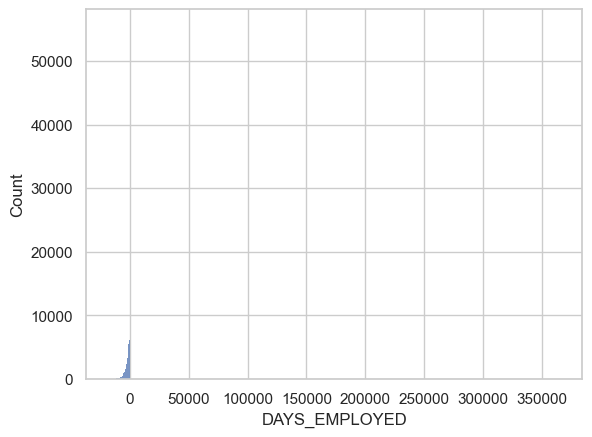

In [20]:
sns.histplot(data=df_application_train, x='DAYS_EMPLOYED')

Nombre de valeurs positives= 55374
(0, 122)


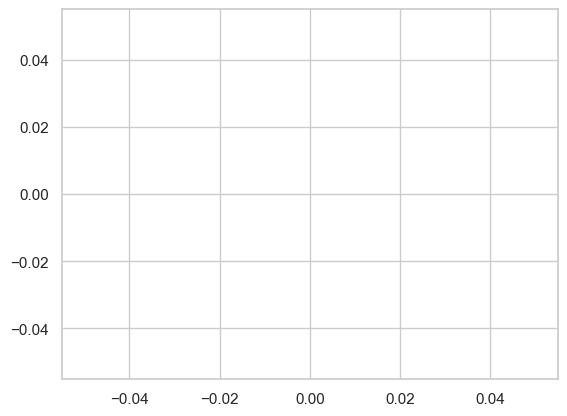

In [21]:
print("Nombre de valeurs positives=",df_application_train.query('DAYS_EMPLOYED > 0').shape[0])
outliers_days_employed = df_application_train.query("DAYS_EMPLOYED > 0 and DAYS_EMPLOYED != 365243")
sns.histplot(data=outliers_days_employed, x='DAYS_EMPLOYED')
print(outliers_days_employed.shape)

In [22]:
outliers_days_employed.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR


Nous nous retrouvons avec 55374 entrées où la valeur DAYS_EMPLOYED est égale à 365243. Cela semble correspondre à une valeur par défaut utilisée lorsqu'il n'y a pas de donnée renseignée.  
***Action à faire:***  
Nous allons donc conserver cela comme une information avec deux opérations:
- passer les valeurs 365243 en np.NaN
- indiquer dans une nouvelle feature booléenne que

**Corrélation à la Target et multi-colinéarité**

In [ ]:
#On enlève les features catégorielles et on isole la target
df_ex_target_ex_cat = df_application_train[[col for col in df_application_train.columns if col not in list_features_categorielles]]
df_ex_target_ex_cat = df_ex_target_ex_cat.dropna(axis=0)
df_target = df_ex_target_ex_cat['TARGET']
df_ex_target_ex_cat = df_ex_target_ex_cat.drop(columns=['TARGET'])

In [24]:
# Perform feature selection unsing univariate statistical test
from sklearn.feature_selection import SelectKBest
#from sklearn.feature_selection import f_regression # => for regression tasks
from sklearn.feature_selection import f_classif # => for classification tasks

kbest = SelectKBest(score_func=f_classif, k=20)

kbest.fit(df_ex_target_ex_cat, df_target)

#print("Feature selection", kbest.get_support())
#print("Features scores", kbest.scores_)
selected_features = list(df_ex_target_ex_cat.columns[kbest.get_support()])
print("Selected features:", selected_features)

Selected features: ['AMT_INCOME_TOTAL', 'DAYS_BIRTH', 'OWN_CAR_AGE', 'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY', 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'APARTMENTS_AVG', 'ELEVATORS_AVG', 'FLOORSMAX_AVG', 'FLOORSMIN_AVG', 'LIVINGAPARTMENTS_AVG', 'FLOORSMAX_MODE', 'FLOORSMIN_MODE', 'FLOORSMAX_MEDI', 'FLOORSMIN_MEDI', 'TOTALAREA_MODE', 'FLAG_DOCUMENT_3', 'AMT_REQ_CREDIT_BUREAU_YEAR']


C:\Users\amcuc\anaconda3\Lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [12 79] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
C:\Users\amcuc\anaconda3\Lib\site-packages\sklearn\feature_selection\_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


In [27]:
selected_features.append('TARGET')

Text(0.5, 1.0, 'Correlation heatmap des principales features corrélées à la target')

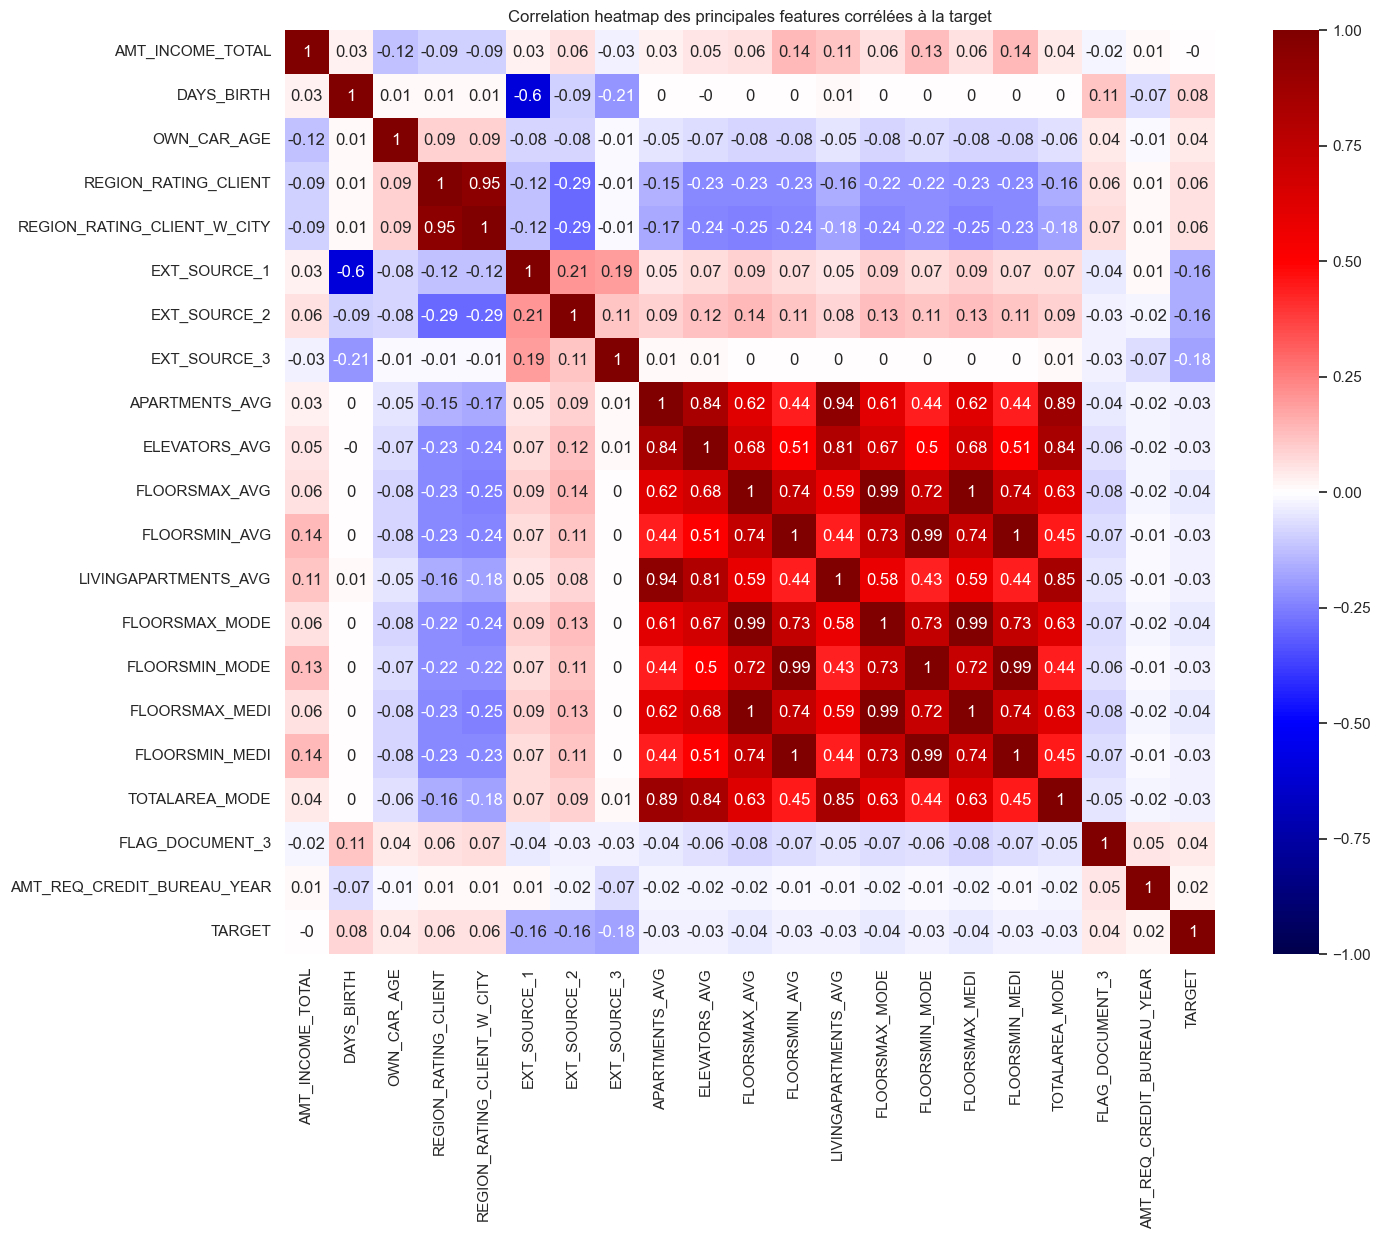

In [28]:
corr = df_application_train[selected_features].corr().round(2)
plt.figure(figsize=(15,12))
sns.heatmap(corr, vmin=-1, vmax=1, annot=True, cmap='seismic')
plt.title("Correlation heatmap des principales features corrélées à la target")

Parmi les principales features corrélées (positivement ou négativement) à la target, nous notons une forte multicolinéarité entre les features:  
- 'APARTMENTS_AVG',
- 'ELEVATORS_AVG',
- 'FLOORSMAX_AVG',
- 'FLOORSMIN_AVG',
- 'LIVINGAPARTMENTS_AVG',
- 'FLOORSMAX_MODE',
- 'FLOORSMIN_MODE',
- 'FLOORSMAX_MEDI',
- 'FLOORSMIN_MEDI',
- 'TOTALAREA_MODE
Si nous utilisons toutes ces variables dans le cadre de la modélisation, nous allons augmenter les erreurs-types des coefficients de ces features et les rendre instables.  
***Action à faire:***  
- Synthétiser en une feature ces features fortement corrélées?

**Data leakage**

Considérant l'analyse précédente de corrélation Concernant un possible data leakage

In [ ]:
df_application_train['NAME_CONTRACT_TYPE'].value_counts()

In [ ]:
df_application_train['NAME_TYPE_SUITE'].unique()

In [ ]:
df_application_train['NAME_HOUSING_TYPE'].unique()

In [ ]:
df_application_train['REGION_POPULATION_RELATIVE'].plot.hist()

In [ ]:
vc_occupation_type = pd.DataFrame(df_application_train['OCCUPATION_TYPE'].value_counts())
vc_occupation_type['freq.'] = round(100*vc_occupation_type['OCCUPATION_TYPE']/vc_occupation_type['OCCUPATION_TYPE'].sum(),2)
display(vc_occupation_type)

In [ ]:
vc_occupation_type = pd.DataFrame(df_application_train['ORGANIZATION_TYPE'].value_counts())
vc_occupation_type['freq.'] = round(100*vc_occupation_type['ORGANIZATION_TYPE']/vc_occupation_type['ORGANIZATION_TYPE'].sum(),2)
display(vc_occupation_type)

In [ ]:
display(df_application_train[['TARGET', 'NAME_CONTRACT_TYPE']].groupby(by=['NAME_CONTRACT_TYPE']).count())
display(df_application_train[['TARGET', 'NAME_CONTRACT_TYPE']].groupby(by=['NAME_CONTRACT_TYPE']).sum())

In [ ]:
df_application_train['EXT_SOURCE_1'].plot.hist(bins=20)

In [ ]:
df_application_train['EXT_SOURCE_2'].plot.hist(bins=20)

In [ ]:
df_application_train['EXT_SOURCE_3'].plot.hist(bins=20)

In [ ]:
sns.pairplot(data = df_application_train[['AMT_REQ_CREDIT_BUREAU_HOUR',
                                          'AMT_REQ_CREDIT_BUREAU_DAY',
                                          'AMT_REQ_CREDIT_BUREAU_WEEK',
                                          'AMT_REQ_CREDIT_BUREAU_MON',
                                          'AMT_REQ_CREDIT_BUREAU_QRT',
                                          'AMT_REQ_CREDIT_BUREAU_YEAR']])

In [ ]:
df_bureau_balance.head()

In [ ]:
df_bureau_balance['STATUS'].value_counts()

**bureau_balance['STATUS']:**
- C means closed
- X means status unknown
- 0 means no DPD
- 1 means maximal did during month between 1-30
- 2 means DPD 31-60
- 3 should mean DPD 61-90
- 4 should mean DPD 91-120
- 5 means DPD 120+ or sold or written off